In [109]:
from pandas import read_csv
df = read_csv("exp_stats.csv")
df.head()

,workprogram_id,user_count,expertise_status,expertise_counter,approval_date_y,title
0,2626,4,AC,1,2022-05-06 14:23:17.924 +0200,Философия
1,8461,4,AC,1,2022-04-28 09:01:59.171 +0200,Философия
2,2627,3,AC,5,2021-08-31 20:51:19.142 +0200,Введение в цифровую культуру и программирование
3,2628,4,AC,0,2022-04-28 11:36:30.474 +0200,Проектирование баз данных
4,2631,4,AC,0,2022-04-28 12:06:31.165 +0200,Современные вопросы информатики


Сначала посмотрим на даты принятия: 

In [110]:
print(df.sort_values("approval_date_y").iloc[0])
print(df.sort_values("approval_date_y").iloc[-1])

workprogram_id                                4787
user_count                                       3
expertise_status                                AC
expertise_counter                                3
approval_date_y      2021-04-21 11:32:30.614 +0200
title                      Оценка жизненного цикла
Name: 1253, dtype: object
workprogram_id                               24618
user_count                                       6
expertise_status                                EX
expertise_counter                                0
approval_date_y      2023-04-17 11:35:20.872 +0200
title                             Китайский язык 2
Name: 7207, dtype: object


Данные с весны 2021 по весну 2023.

Теперь проверим user_count:

In [111]:
print(df.sort_values("user_count").iloc[0])
print(df.sort_values("user_count").iloc[-1])

workprogram_id                                    20532
user_count                                            1
expertise_status                                     AC
expertise_counter                                     2
approval_date_y           2022-05-04 20:34:29.570 +0200
title                Программирование микроконтроллеров
Name: 1851, dtype: object
workprogram_id                               22664
user_count                                      17
expertise_status                                AC
expertise_counter                                2
approval_date_y      2023-01-10 13:06:51.293 +0100
title                      Эмоциональный интеллект
Name: 2288, dtype: object


Значения от 1 до 17.

In [112]:
df["expertise_status"].unique()

array(['AC', 'RE', 'EX', 'AR', 'WK'], dtype=object)

In [113]:
for i in df.itertuples(index=False):
    if i[2]=="AC" and i[3] == 0:
        print(i)

Pandas(workprogram_id=2628, user_count=4, expertise_status='AC', expertise_counter=0, approval_date_y='2022-04-28 11:36:30.474 +0200', title='Проектирование баз данных')
Pandas(workprogram_id=2631, user_count=4, expertise_status='AC', expertise_counter=0, approval_date_y='2022-04-28 12:06:31.165 +0200', title='Современные вопросы информатики')
Pandas(workprogram_id=19151, user_count=10, expertise_status='AC', expertise_counter=0, approval_date_y='2022-10-07 19:07:20.602 +0200', title='Современные инструменты анализа данных')
Pandas(workprogram_id=22808, user_count=2, expertise_status='AC', expertise_counter=0, approval_date_y='2023-01-30 12:41:48.484 +0100', title='Линейная алгебра')
Pandas(workprogram_id=2654, user_count=7, expertise_status='AC', expertise_counter=0, approval_date_y='2021-07-08 16:06:24.358 +0200', title='Дискретная математика')
Pandas(workprogram_id=2656, user_count=3, expertise_status='AC', expertise_counter=0, approval_date_y='2022-04-28 11:00:32.876 +0200', title=

Как видим, курсов, прошедших экспертизу без, собственно, экспертизы, довольно много.

Проверим зависимость количества редакторов от времени. 

Для этого используем box plot: оранжевая линия - медиана, границы блоков - 1 и 3 квартили, длина "усов" - 150% от расстояния между 1 и 3 квартилями, круги - выбросы.

In [114]:
import pandas
df["year"] =  pandas.to_datetime(df["approval_date_y"],errors='coerce', utc=True)
df["year"] =  df["year"].dt.to_period(freq='Q')
#print(df["year"])
df212 = df[df["year"] == "2021Q2"] 
df213 = df[df["year"] == "2021Q3"] 
df214 = df[df["year"] == "2021Q4"] 
df221 = df[df["year"] == "2022Q1"] 
df222 = df[df["year"] == "2022Q2"] 
df223 = df[df["year"] == "2022Q3"] 
df224 = df[df["year"] == "2022Q4"] 
df23 = df[(df["year"] == "2023Q1") | (df["year"] == "2023Q2")] #так как из Q2 2023 только кусок апреля, я решил объединить его с Q1

"""
df21 = df[df["year"] == "2021"] 
df22 = df[df["year"] == "2022"] 
df23 = df[df["year"] == "2023"] 
"""
quarters=["2021Q2", "2021Q3", "2021Q4","2022Q1","2022Q2","2022Q3","2022Q4", "2023Q1"]
quarterly_data = [df212,df213,df214,df221,df222,df223,df224,df23]

/tmp/ipykernel_166153/2062770522.py:3: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df["year"] =  df["year"].dt.to_period(freq='Q')


/tmp/ipykernel_166153/2310353527.py:19: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  subplot(2, 4, i+1)
/tmp/ipykernel_166153/2310353527.py:19: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  subplot(2, 4, i+1)
/tmp/ipykernel_166153/2310353527.py:19: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  subplot(2, 4, i+1)
/tmp/ipykernel_166153/2310353527.py:19: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  subplot(2, 4, i+1)
/tmp/ipykernel_166153/2310353527.py:19: MatplotlibDeprecationWarning

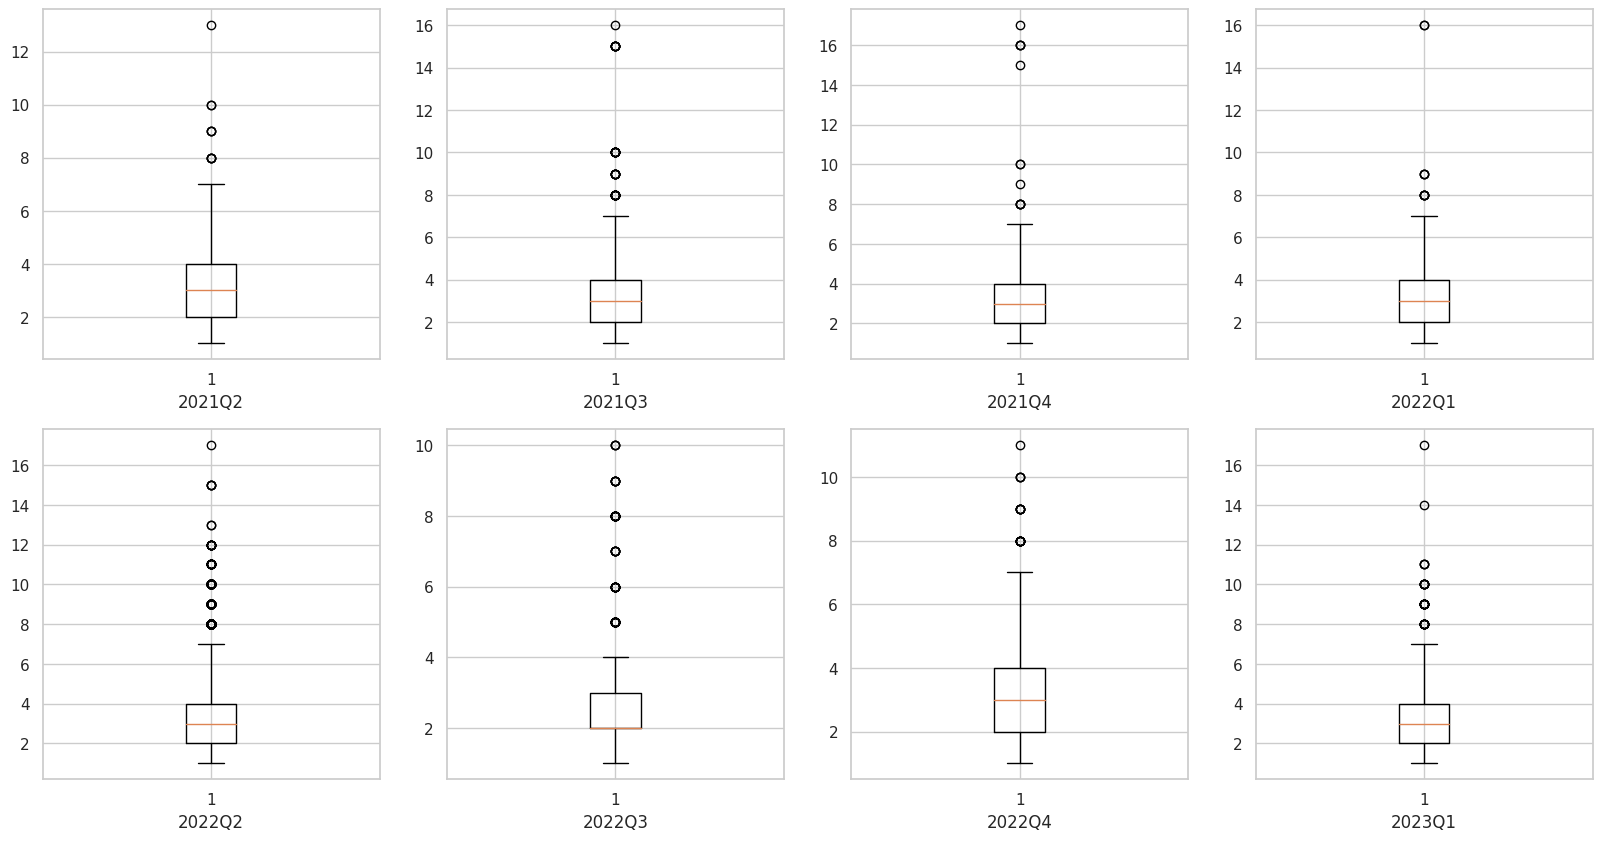

In [115]:
from matplotlib.pyplot import boxplot
from matplotlib.pyplot import xlabel
from matplotlib.pyplot import figure
from matplotlib.pyplot import subplot
from matplotlib.pyplot import rcParams
from matplotlib.pyplot import bar
from matplotlib.pyplot import show
rcParams['figure.figsize'] = [20, 10]
"""
avg_editors = []
med_editors=[]
for i in quarterly_data:
    avg_editors.append(i["user_count"].mean())
    med_editors.append(i["user_count"].median())
"""
fig = figure()
axes = fig.subplots(nrows=3, ncols=3)
for i in range(len(quarterly_data)):
    subplot(2, 4, i+1)
    xlabel(quarters[i])
    boxplot(quarterly_data[i]["user_count"])
show()

Можно заметить, что во всех кварталах, кроме 3-го в 2022, у средней программы 3 редактора, также довольно много программ с 1 редактором либо от 3 до 8, а у нескольких в месяц больше 10. Из этой закономерности сильно выбивается 3 квартал 2022 года, где у средней программы 2 редактора, больше 4 очень мало, а самый большой "выброс" - 10.

Аналогичную диаграмму построим для количества экспертиз:

/tmp/ipykernel_166153/2893932021.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  subplot(2, 4, i+1)
/tmp/ipykernel_166153/2893932021.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  subplot(2, 4, i+1)
/tmp/ipykernel_166153/2893932021.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  subplot(2, 4, i+1)
/tmp/ipykernel_166153/2893932021.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  subplot(2, 4, i+1)
/tmp/ipykernel_166153/2893932021.py:4: MatplotlibDeprecationWarning: Aut

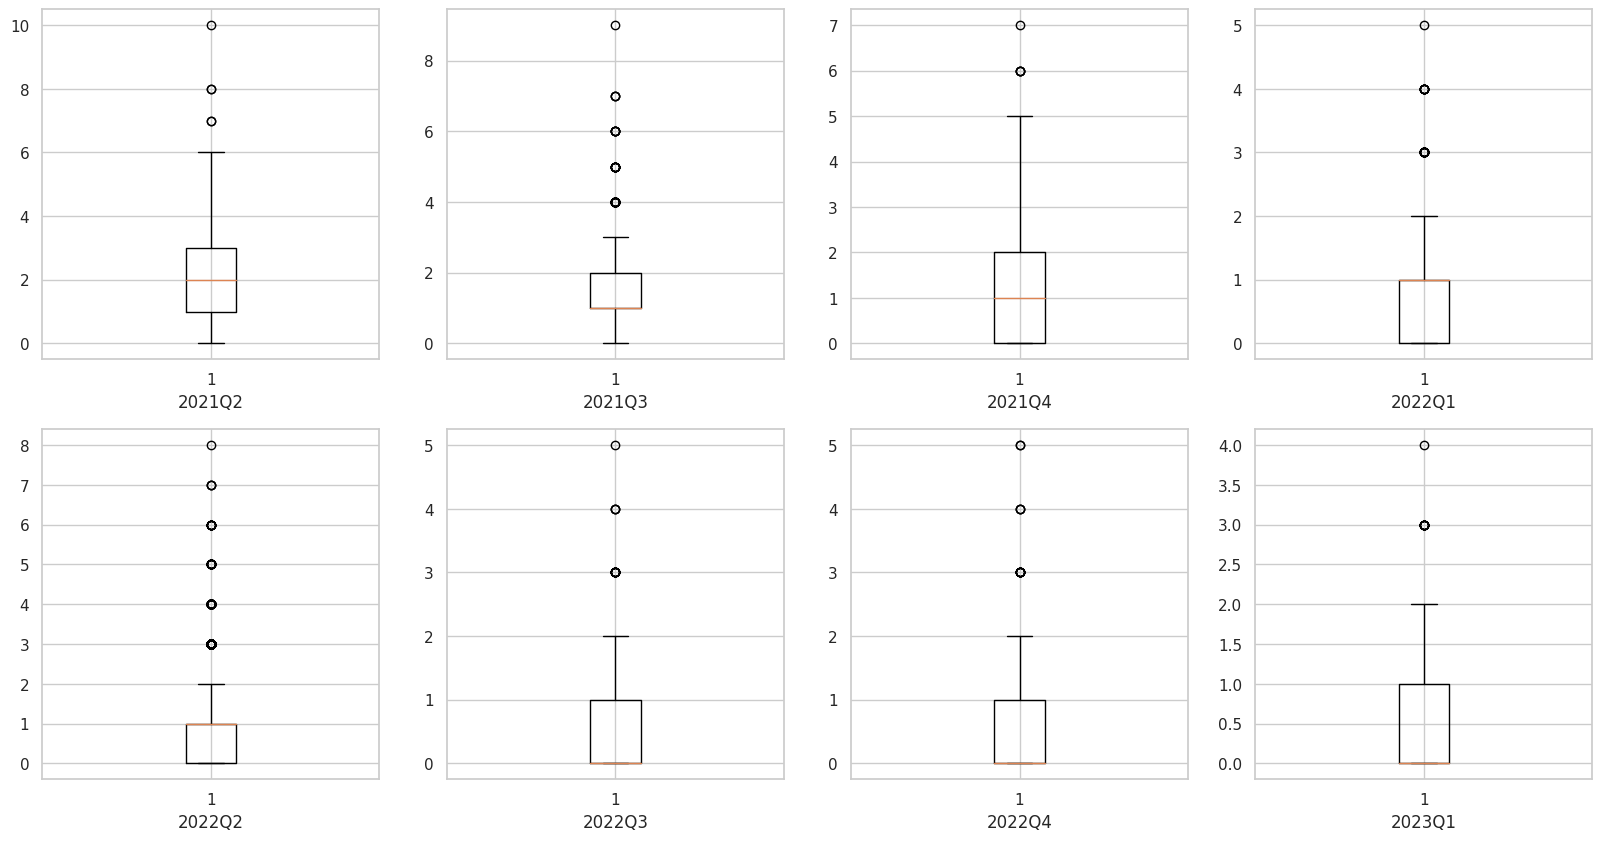

In [116]:
fig = figure()
axes = fig.subplots(nrows=3, ncols=3)
for i in range(len(quarterly_data)):
    subplot(2, 4, i+1)
    xlabel(quarters[i])
    boxplot(quarterly_data[i]["expertise_counter"])
show()

Первый квартал наблюдений - единственный, когда больше половины программ прошло как минимум две экспертизы, а в 3 и 4 кварталах 2022 и в 2023 больше половины программ не прошли ни одной. В целом можно заметить, что количество пройденных экспертиз со временем снижалось. Это можно по идее списать на то, что среди более "свежих" программ может быть больше еще не принятых проектов. Кстати, именно это сейчас и предстоит проверить.

[447, 429, 486, 377, 3088, 514, 551, 1109]
[46, 19, 16, 15, 286, 13, 50, 211]


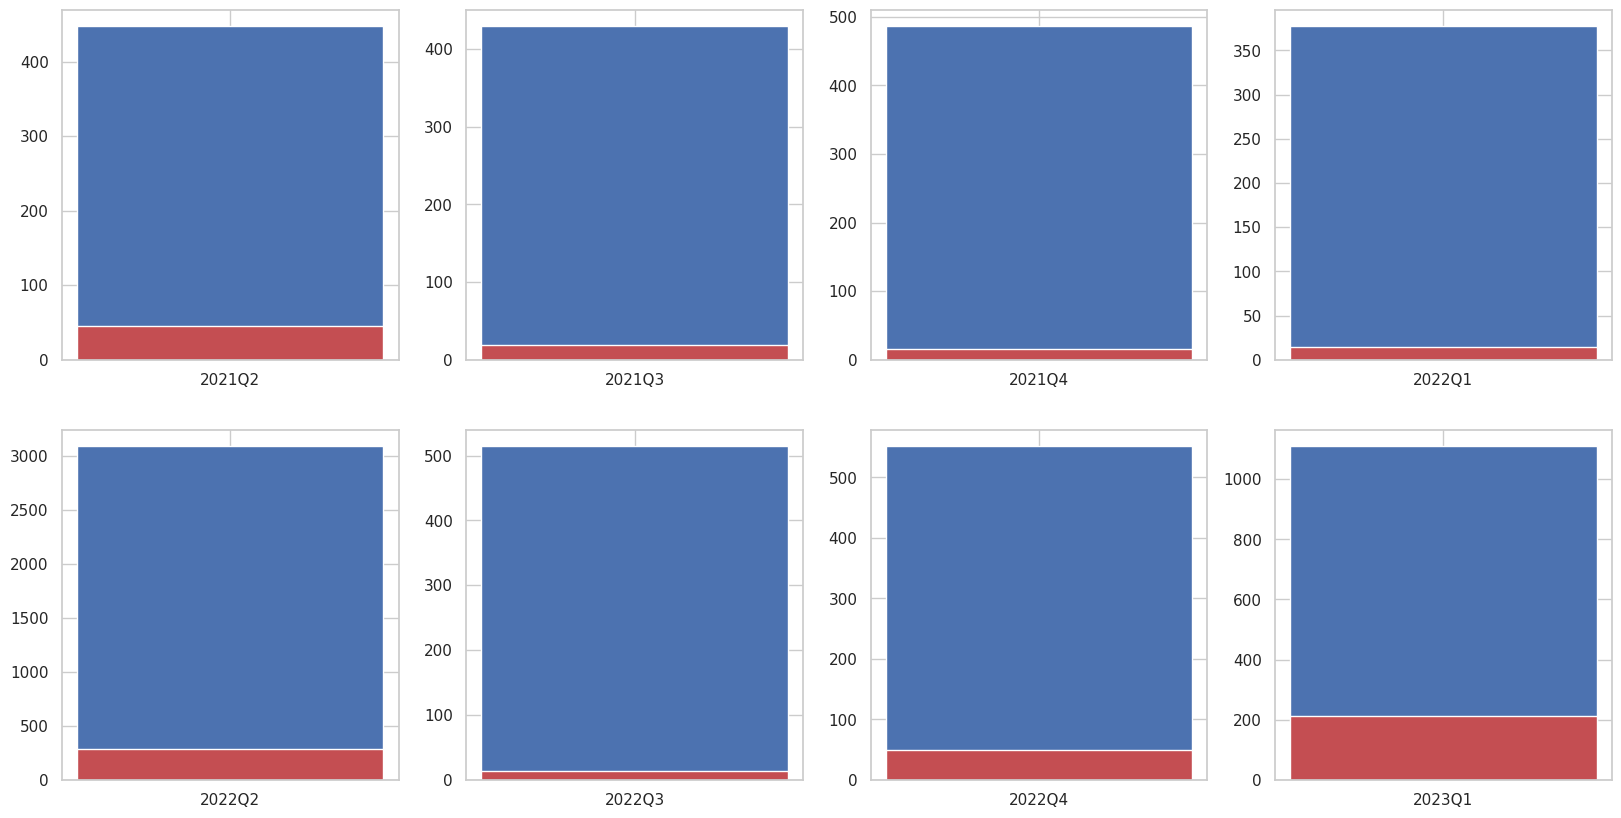

In [117]:
accepted = [0 for i in range(len(quarterly_data))]
not_accepted = [0 for i in range(len(quarterly_data))]
for i in range(len(quarterly_data)):
    for index, row in quarterly_data[i].iterrows():
        if row["expertise_status"] == "AC":
            accepted[i] += 1
        else:
            not_accepted[i] += 1 
print(accepted)
print(not_accepted)
for i in range(len(quarterly_data)):
    subplot(2, 4, i+1)
    bar(quarters[i],accepted[i], color='b')
    bar(quarters[i],not_accepted[i], color='r')
show()

Можно заметить, что в последнем квартале на самом деле больше доля неутвержденных планов, но их не так много, чтобы это объясняло то, что больше половины не проходило экспертизу.

Теперь посмотрим, как с той же задачей справится ChatGPT 4o mini (с официального сайта). Сначала я попытался использовать такой промпт:

```
I have a Pandas dataframe that includes information about university curriculums. Here is an example of an entry:

workprogram_id                                    20532
user_count                                            1
expertise_status                                     AC
expertise_counter                                     2
approval_date_y           2022-05-04 20:34:29.570 +0200
title                Microcontroller Programming

Can you help me write a Python program that visualises the effect of time on the spread of user_count? (include multiple metrics: averages, medians and other statistical metrics that you think fit) I think to get the right scale it's a good idea to split time into quarters, so I added a new column "year", which has the following values: "2021Q2", "2021Q3", "2021Q4","2022Q1","2022Q2","2022Q3","2022Q4", "2023Q1".
```

Проблема в том, что matplotlib и seaborn не принимают кварталы в качестве оси для графика, а ChatGPT об этом, похоже, не знает. Поэтому пришлось использовать созданные мной датафреймы и скорректировать промпт: 
```
I have a Pandas dataframe that includes information about university curriculums. Here is an example of an entry:

workprogram_id                                    20532
user_count                                            1
expertise_status                                     AC
expertise_counter                                     2
approval_date_y           2022-05-04 20:34:29.570 +0200
title                Microcontroller Programming

Can you help me write a Python program that visualises the effect of time on the spread of user_count? (include multiple metrics: averages, medians and other statistical metrics that you think fit) I think to get the right scale it's a good idea to split time into quarters, so I split the dataframe into separate ones for each quarter: df212,df213,df214,df221,df222,df223,df224,df23 (I've split the dataframe already, you don't need to include that process in your answer)
```
Получился такой график:

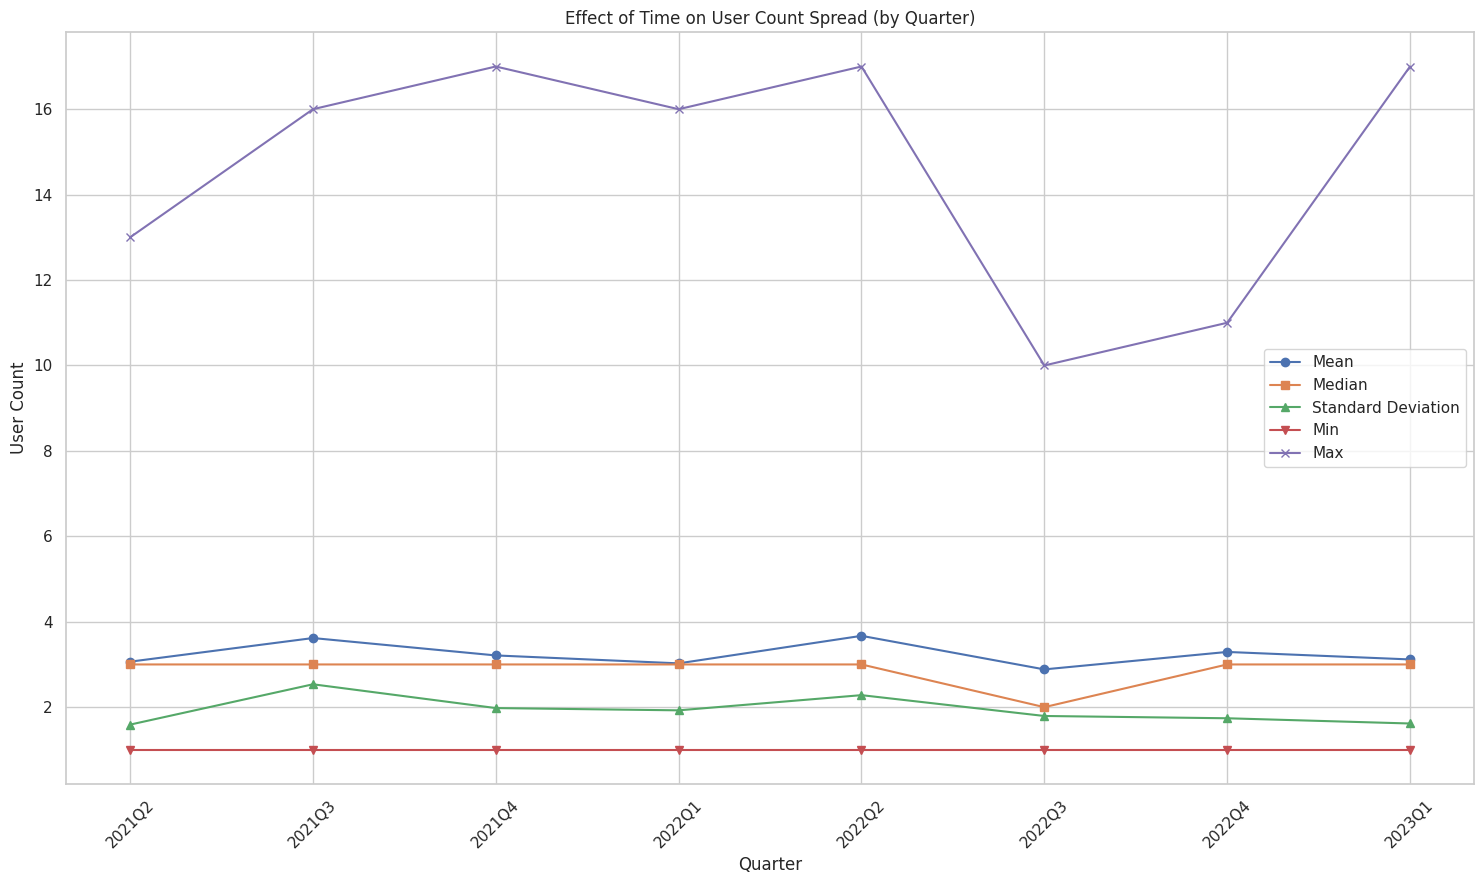

In [118]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have the DataFrames: df212, df213, df214, etc.

# List of dataframes representing different quarters
dfs = [df212, df213, df214, df221, df222, df223, df224, df23]
quarter_labels = ["2021Q2", "2021Q3", "2021Q4","2022Q1","2022Q2","2022Q3","2022Q4", "2023Q1"]

# Create an empty dictionary to store metrics for each quarter
metrics = {
    'quarter': [],
    'mean': [],
    'median': [],
    'std_dev': [],
    'min': [],
    'max': []
}

# Iterate over each DataFrame (each quarter)
for i, df in enumerate(dfs):
    # Calculate the required statistics for 'user_count'
    metrics['quarter'].append(quarter_labels[i])
    metrics['mean'].append(df['user_count'].mean())
    metrics['median'].append(df['user_count'].median())
    metrics['std_dev'].append(df['user_count'].std())
    metrics['min'].append(df['user_count'].min())
    metrics['max'].append(df['user_count'].max())

# Convert the metrics dictionary to a DataFrame for easy plotting
metrics_df = pd.DataFrame(metrics)

# Plotting the metrics over the quarters
plt.figure(figsize=(15, 9))

# Plot each statistic
plt.plot(metrics_df['quarter'], metrics_df['mean'], label='Mean', marker='o')
plt.plot(metrics_df['quarter'], metrics_df['median'], label='Median', marker='s')
plt.plot(metrics_df['quarter'], metrics_df['std_dev'], label='Standard Deviation', marker='^')
plt.plot(metrics_df['quarter'], metrics_df['min'], label='Min', marker='v')
plt.plot(metrics_df['quarter'], metrics_df['max'], label='Max', marker='x')

# Adding labels and title
plt.xlabel('Quarter')
plt.ylabel('User Count')
plt.title('Effect of Time on User Count Spread (by Quarter)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()


Мне кажется, результат неплохой. Просадка в 3 квартале 2022 года вполне заметна.

Для второго задания не будем набирать промпт заново, а просто заменим user_count на expertise_counter.

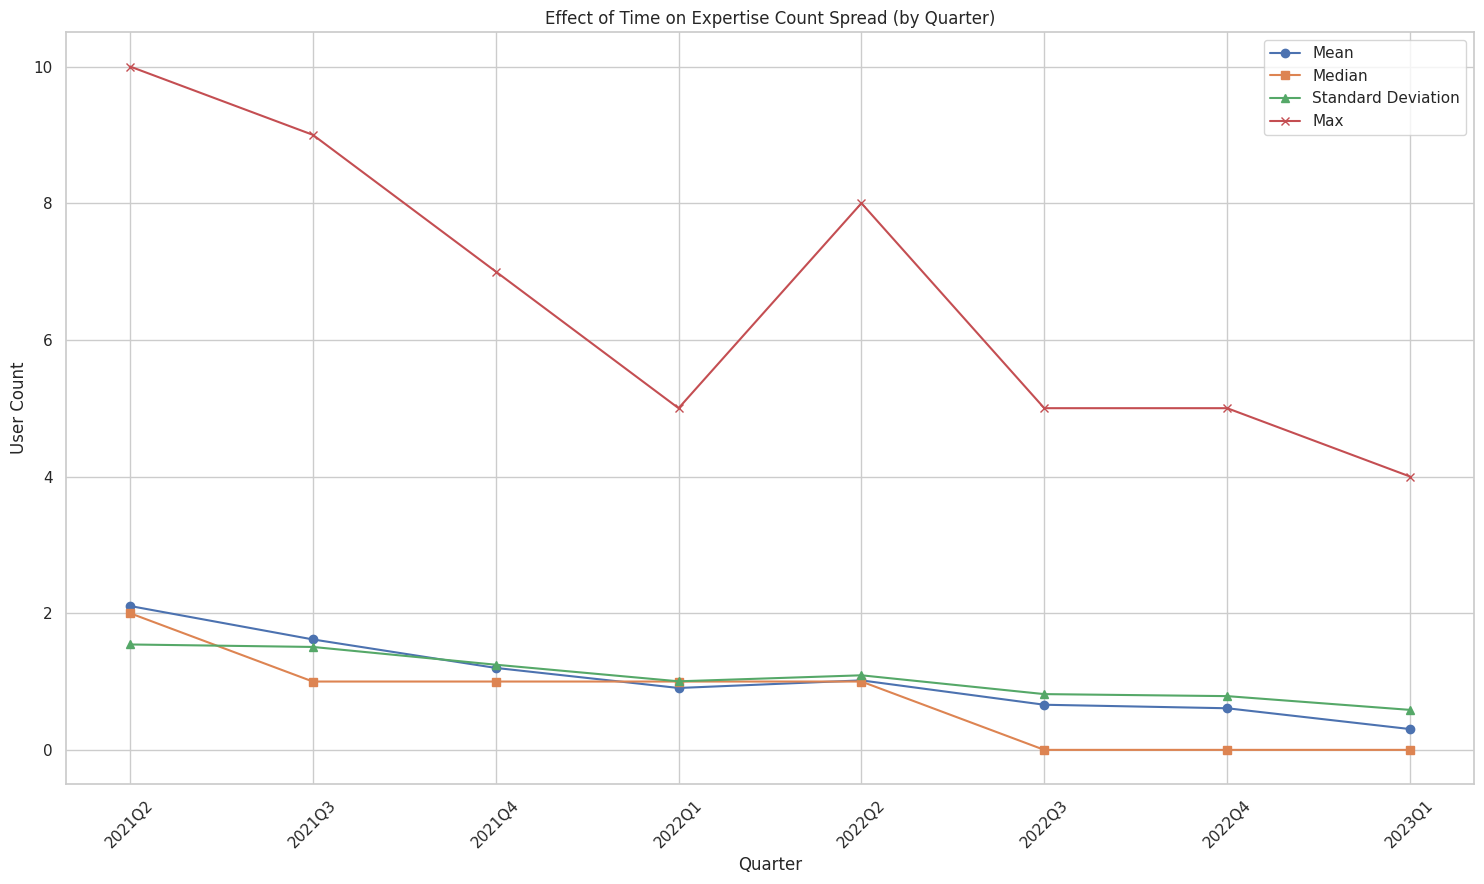

In [119]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have the DataFrames: df212, df213, df214, etc.

# List of dataframes representing different quarters
dfs = [df212, df213, df214, df221, df222, df223, df224, df23]
quarter_labels = ["2021Q2", "2021Q3", "2021Q4","2022Q1","2022Q2","2022Q3","2022Q4", "2023Q1"]

# Create an empty dictionary to store metrics for each quarter
metrics = {
    'quarter': [],
    'mean': [],
    'median': [],
    'std_dev': [],
    'min': [],
    'max': []
}

# Iterate over each DataFrame (each quarter)
for i, df in enumerate(dfs):
    # Calculate the required statistics for 'expertise_counter'
    metrics['quarter'].append(quarter_labels[i])
    metrics['mean'].append(df['expertise_counter'].mean())
    metrics['median'].append(df['expertise_counter'].median())
    metrics['std_dev'].append(df['expertise_counter'].std())
    metrics['min'].append(df['expertise_counter'].min()) 
    metrics['max'].append(df['expertise_counter'].max())

# Convert the metrics dictionary to a DataFrame for easy plotting
metrics_df = pd.DataFrame(metrics)

# Plotting the metrics over the quarters
plt.figure(figsize=(15, 9))

# Plot each statistic
plt.plot(metrics_df['quarter'], metrics_df['mean'], label='Mean', marker='o')
plt.plot(metrics_df['quarter'], metrics_df['median'], label='Median', marker='s')
plt.plot(metrics_df['quarter'], metrics_df['std_dev'], label='Standard Deviation', marker='^')
#plt.plot(metrics_df['quarter'], metrics_df['min'], label='Min', marker='v') здесь везде 0
plt.plot(metrics_df['quarter'], metrics_df['max'], label='Max', marker='x')

# Adding labels and title
plt.xlabel('Quarter')
plt.ylabel('User Count')
plt.title('Effect of Time on Expertise Count Spread (by Quarter)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()


На графике виден общий тренд вниз.

Теперь посмотрим зависимость принятия планов от времени. Промпт такой:

```
I have a Pandas dataframe that includes information about university curriculums. Here is an example of an entry:

workprogram_id                                    20532
user_count                                            1
expertise_status                                     AC
expertise_counter                                     2
approval_date_y           2022-05-04 20:34:29.570 +0200
title                Microcontroller Programming

Can you help me write a Python program that visualises the effect of time on the share of programs that are accepted (expertise status AC)? I think to get the right scale it's a good idea to split time into quarters, so I split the dataframe into separate ones for each quarter: df212,df213,df214,df221,df222,df223,df224,df23 (I've split the dataframe already, you don't need to include that process in your answer)
```

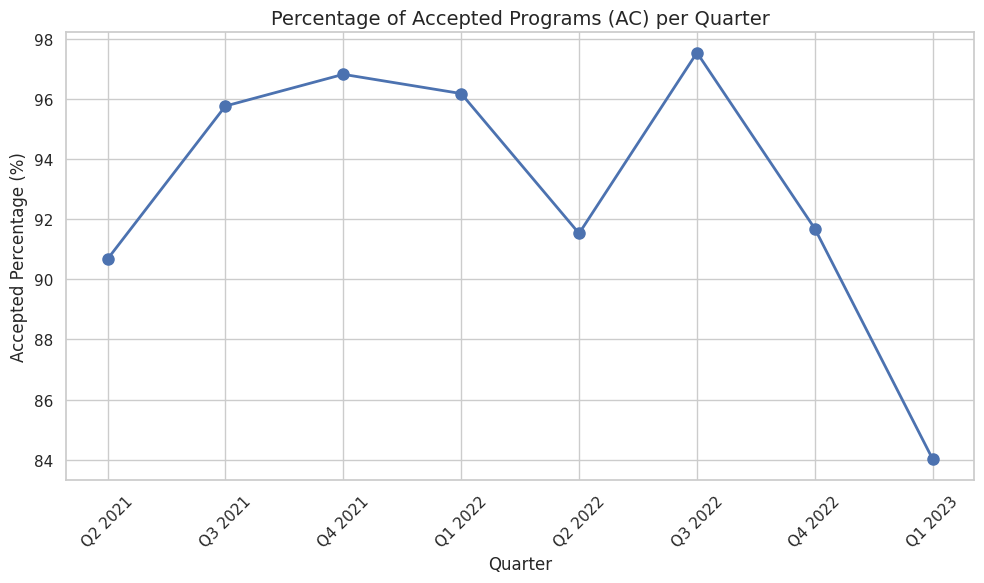

In [121]:
quarter_dfs = [df212, df213, df214, df221, df222, df223, df224, df23]

# List of quarters corresponding to each dataframe
quarters = ['Q2 2021', 'Q3 2021', 'Q4 2021', 'Q1 2022', 'Q2 2022', 'Q3 2022', 'Q4 2022','Q1 2023' ]

# List to store the percentage of accepted programs for each quarter
accepted_percentages = []

# Loop over each dataframe and calculate the percentage of accepted programs (AC)
for df in quarter_dfs:
    # Calculate the percentage of 'AC' in the 'expertise_status' column
    ac_count = df[df['expertise_status'] == 'AC'].shape[0]
    total_count = df.shape[0]
    ac_percentage = (ac_count / total_count) * 100
    accepted_percentages.append(ac_percentage)

# Create a new dataframe with the results
result_df = pd.DataFrame({
    'Quarter': quarters,
    'Accepted Percentage': accepted_percentages
})

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(result_df['Quarter'], result_df['Accepted Percentage'], marker='o', color='b', linestyle='-', linewidth=2, markersize=8)
plt.title('Percentage of Accepted Programs (AC) per Quarter', fontsize=14)
plt.xlabel('Quarter', fontsize=12)
plt.ylabel('Accepted Percentage (%)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

Мне кажется, график даже информативнее столбчатой диаграммы, правда не показывает количество планов в каждом квартале.

Что можно сказать в итоге: GPT хорошо справляется с созданием самих диаграмм, а вот предобработку данных лучше делать вручную.